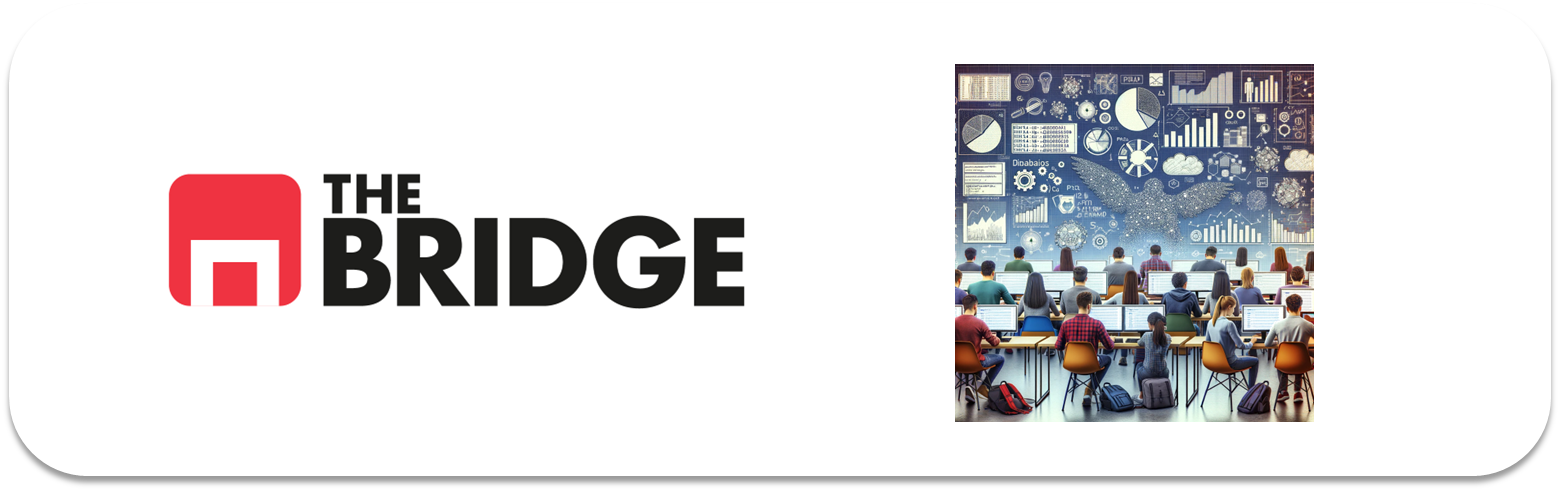

# **PRÁCTICA OBLIGATORIA**: Regresión Lineal y Regularización

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

## Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:
- **CRIM:** Tasa de criminalidad per cápita por ciudad.
- **ZN:** Proporción de terreno residencial destinado a lotes de más de 25.000 pies cuadrados.
- **INDUS:** Proporción de acres de negocios no minoristas por ciudad.
- **CHAS:** Variable ficticia del río Charles (1 si el sector limita con el río; 0 en caso contrario).
- **NOX:** Concentración de óxidos de nitrógeno (partes por 10 millones).
- **RM:** Número promedio de habitaciones por vivienda.
- **AGE:** Proporción de unidades ocupadas por el propietario construidas antes de 1940.
- **DIS:** Distancias ponderadas a cinco centros de empleo de Boston.
- **RAD:** Índice de accesibilidad a autopistas radiales.
- **TAX:** Tasa de impuesto sobre la propidf_trainingd de valor total por $10.000.
- **PTRATIO:** Relación alumno-maestro por ciudad.
- **LSTAT:** % de población de estatus socioeconómico bajo.
- **MEDV:** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

## Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE, RMSE, MSE y R², comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X, y de train y test.
5. Haz un mini-df_training, selecciona las features que quieres qudf_trainingrte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías? ¿por qué?

In [1]:
from scipy import stats

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


plt.style.use("petroff10")

pd.options.mode.copy_on_write = True

## Dataset del Área Metropolitana de Bóston

> **Objetivo**:
>
> Construir un modelo que prediga la *mediana del precio de las casas en una zona del **área metropolitana de Boston*** dadas las características de las mismas.

La variable target es **MEDV**, que representa el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

Cargamos el dataset.

In [2]:
df_boston = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Cuenta con 506 registros y 13 columnas. No hay valores nulos como se mencionaba previamente.

#### Análisis de MEDV

Gráficamos un histograma visualizando la densidad de probabilidad.

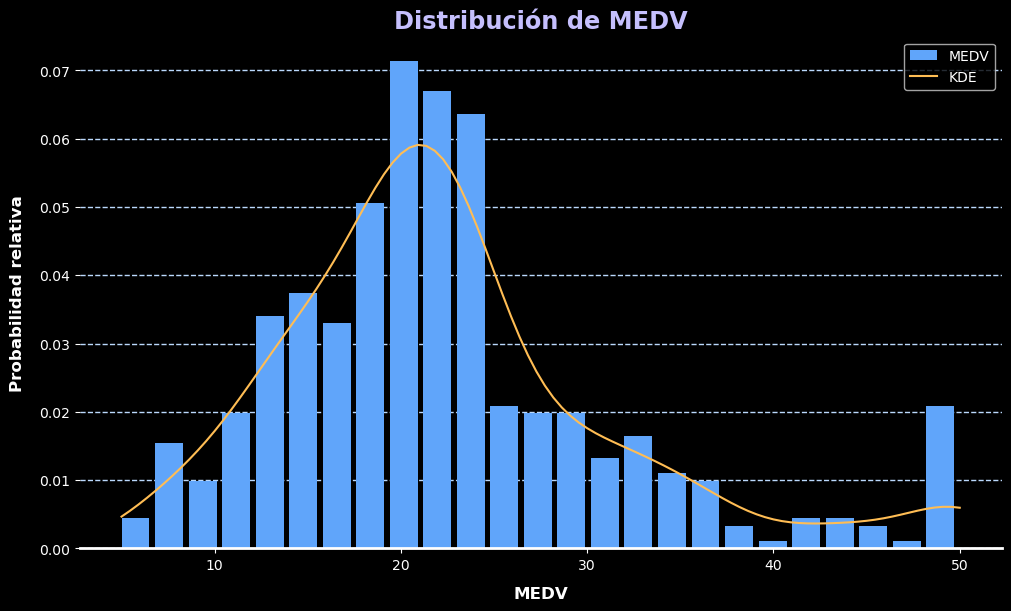

In [4]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.set_title("Distribución de MEDV", color="#C5BFFD", fontdict=font_config)
ax.hist(x="MEDV",
		data=df_boston,
		bins=25,
		density=True,
		color="#60A5FA",
		width=1.5,
		zorder=2)

x = np.linspace(df_boston["MEDV"].min(), df_boston["MEDV"].max(), 100)
kde = stats.gaussian_kde(df_boston["MEDV"])
ax.plot(x, kde(x), color="#FFBD54", label="KDE")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.set_xlabel("MEDV", labelpad=10, fontdict=font_config)
ax.set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
ax.grid(axis="y", alpha=1, color="#BBD9FD", linestyle="dashed", linewidth=1)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.legend()

plt.show()

#### Train-Test Split

Corroboramos que la distribución de la variable objetivo o target se asemeja a una distribución normal.

In [5]:
df_training, df_test = train_test_split(df_boston,
										test_size=0.3,
										shuffle=True,
										random_state=42)
df_training = df_training.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
print("TRAINING")
print("-"*25)
print(f"{df_training.shape[0]} registros")

print("\nTEST")
print("-"*25)
print(f"{df_test.shape[0]} registros")

TRAINING
-------------------------
354 registros

TEST
-------------------------
152 registros


#### Mini Exploratory Data Analysis

Realizamos un pequeño análisis de los datos para entender con que nos encontramos.

In [6]:
df_training.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.469887,8.315831,0.00906,0.08232,0.25651,3.281688,88.9762
ZN,354.0,11.403955,22.608457,0.00000,0.00000,0.00000,20.000000,95.0000
INDUS,354.0,11.133051,6.938651,1.21000,5.13000,9.69000,18.100000,27.7400
CHAS,354.0,0.073446,0.261237,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,354.0,0.557259,0.116792,0.38500,0.45000,0.53800,0.631000,0.8710
RM,354.0,6.325672,0.719211,3.86300,5.88950,6.22750,6.681750,8.7800
AGE,354.0,68.799718,27.665360,2.90000,46.02500,77.35000,93.475000,100.0000
DIS,354.0,3.765874,2.126032,1.12960,2.07370,3.10730,5.400700,12.1265
RAD,354.0,9.437853,8.639971,1.00000,4.00000,5.00000,24.000000,24.0000
TAX,354.0,407.042373,166.522237,187.00000,279.00000,330.00000,666.000000,711.0000


Cardinalidad de las columnas.

In [7]:
df_training.nunique()

CRIM       353
ZN          23
INDUS       69
CHAS         2
NOX         80
RM         323
AGE        274
DIS        301
RAD          9
TAX         61
PTRATIO     43
LSTAT      327
MEDV       195
dtype: int64

La variable `RAD` y `CHAS` tienen pocos valores únicos lo que nos permite deducir que se trata de una variable binaria y otra categórica.

In [8]:
df_training.nunique()/df_training.shape[0]

CRIM       0.997175
ZN         0.064972
INDUS      0.194915
CHAS       0.005650
NOX        0.225989
RM         0.912429
AGE        0.774011
DIS        0.850282
RAD        0.025424
TAX        0.172316
PTRATIO    0.121469
LSTAT      0.923729
MEDV       0.550847
dtype: float64

##### **CRIM:** Tasa de criminalidad per cápita por ciudad

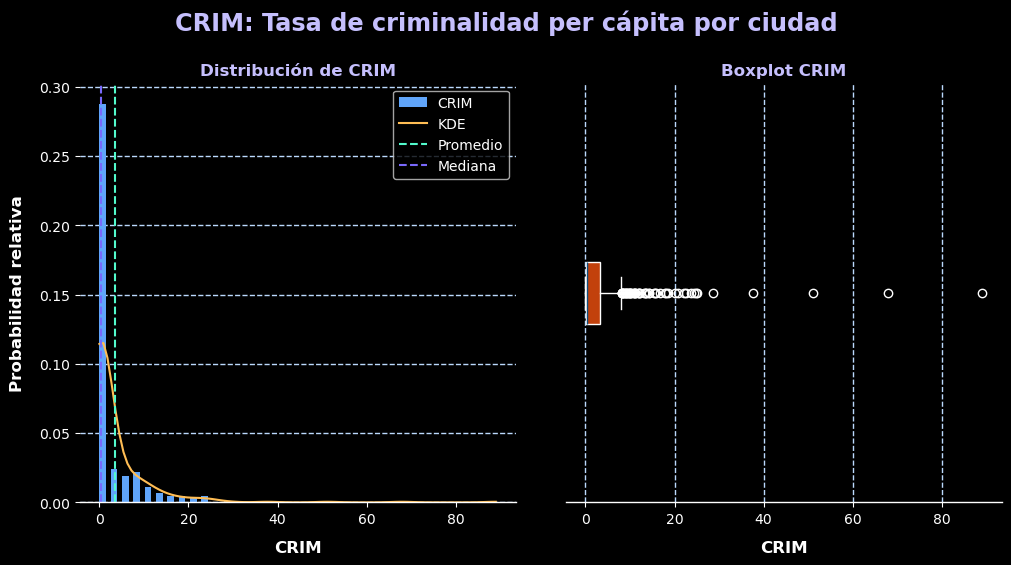

In [9]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle(t="CRIM: Tasa de criminalidad per cápita por ciudad",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de CRIM",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="CRIM",
			data=df_training,
			bins=35,
			density=True,
			color="#60A5FA",
			width=1.5,
			zorder=2)

x = np.linspace(df_training["CRIM"].min(), df_training["CRIM"].max(), 100)
kde = stats.gaussian_kde(df_training["CRIM"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["CRIM"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["CRIM"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("CRIM", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot CRIM",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="CRIM",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("CRIM", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

La *tasa de criminalidad per cápita por ciudad* tiene mucha presencia de outliers. La distribución se asemeja a una `log normal`.

##### **DIS:** Distancias ponderadas a cinco centros de empleo de Bóston

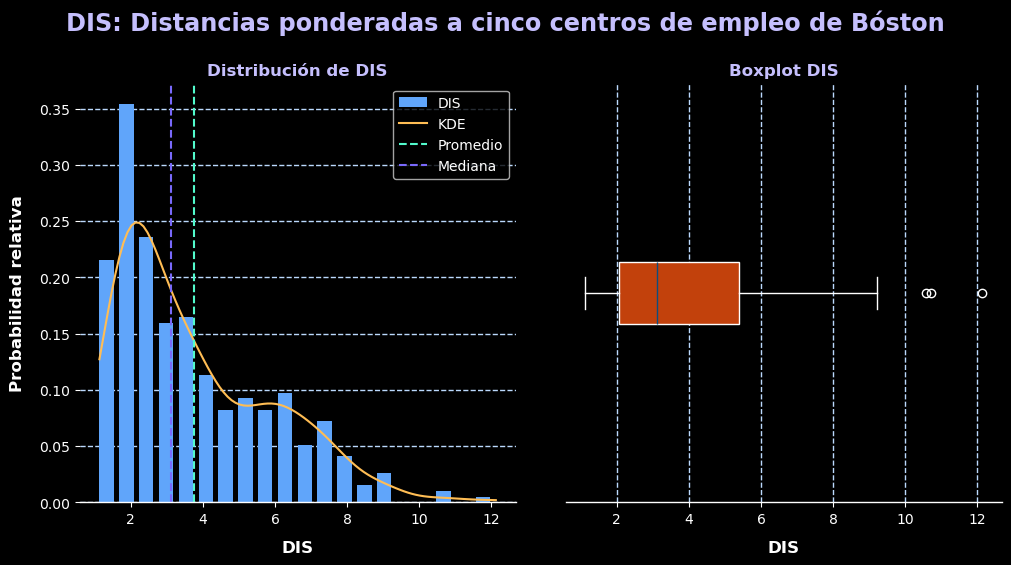

In [10]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle(t="DIS: Distancias ponderadas a cinco centros de empleo de Bóston",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de DIS",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="DIS",
			data=df_training,
			bins=20,
			density=True,
			color="#60A5FA",
			width=0.4,
			zorder=2)

x = np.linspace(df_training["DIS"].min(), df_training["DIS"].max(), 100)
kde = stats.gaussian_kde(df_training["DIS"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["DIS"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["DIS"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("DIS", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot DIS",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="DIS",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("DIS", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **ZN:** Proporción de terreno residencial destinado a lotes de más de 25.000 pies cuadrados

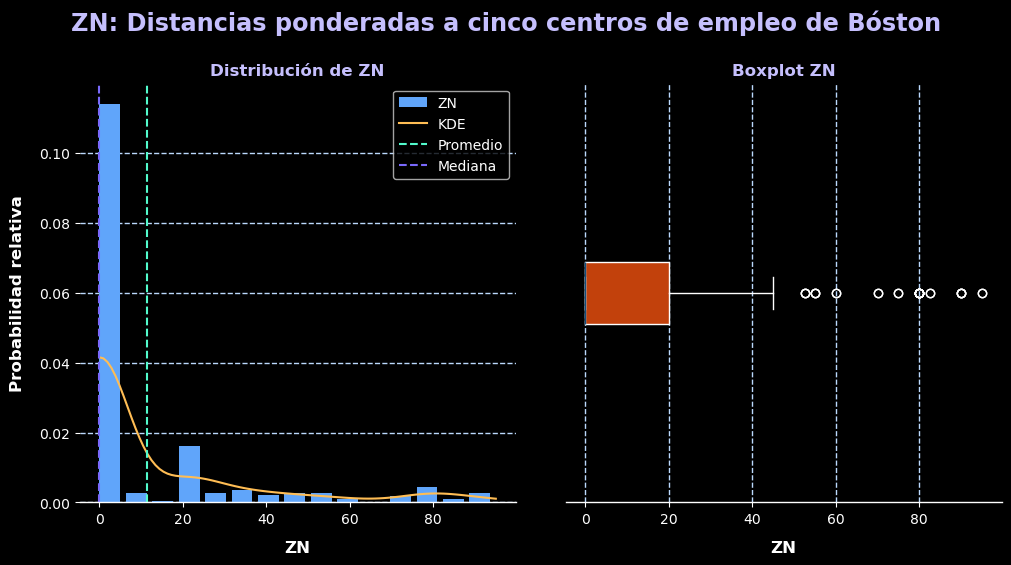

In [11]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle(t="ZN: Distancias ponderadas a cinco centros de empleo de Bóston",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de ZN",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="ZN",
			data=df_training,
			bins=15,
			density=True,
			color="#60A5FA",
			width=5,
			zorder=2)

x = np.linspace(df_training["ZN"].min(), df_training["ZN"].max(), 100)
kde = stats.gaussian_kde(df_training["ZN"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["ZN"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["ZN"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("ZN", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot ZN",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="ZN",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("ZN", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

La mediana es cero, muy alejada del promedio de los datos.

##### **INDUS:** Proporción de acres de negocios no minoristas por ciudad

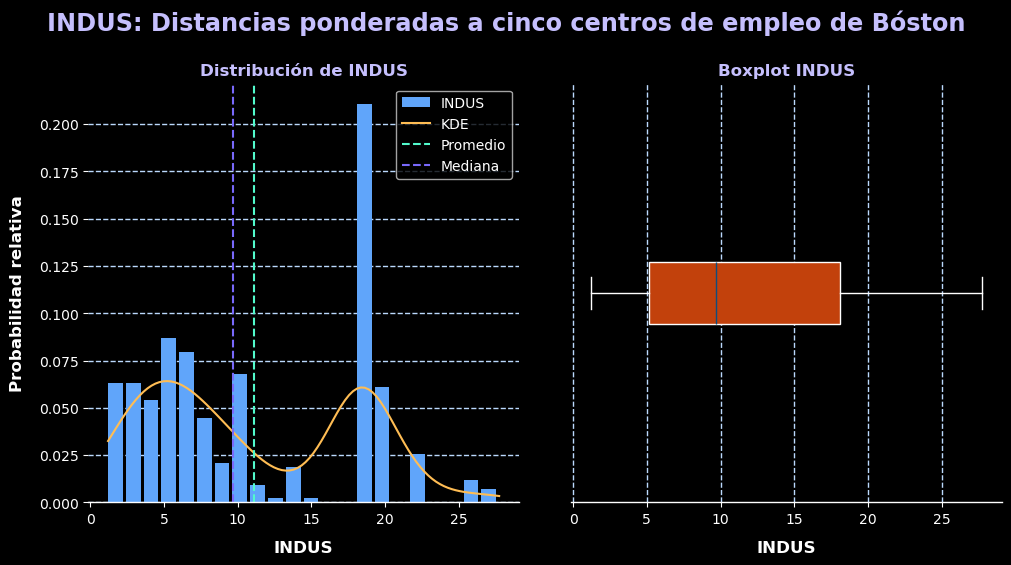

In [12]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle("INDUS: Distancias ponderadas a cinco centros de empleo de Bóston",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de INDUS",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="INDUS",
			data=df_training,
			bins=22,
			density=True,
			color="#60A5FA",
			width=1,
			zorder=2)

x = np.linspace(df_training["INDUS"].min(), df_training["INDUS"].max(), 100)
kde = stats.gaussian_kde(df_training["INDUS"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")


axs[0].axvline(df_training["INDUS"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["INDUS"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("INDUS", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot INDUS",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="INDUS",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("INDUS", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **NOX:** Concentración de óxidos de nitrógeno (partes por 10 millones)

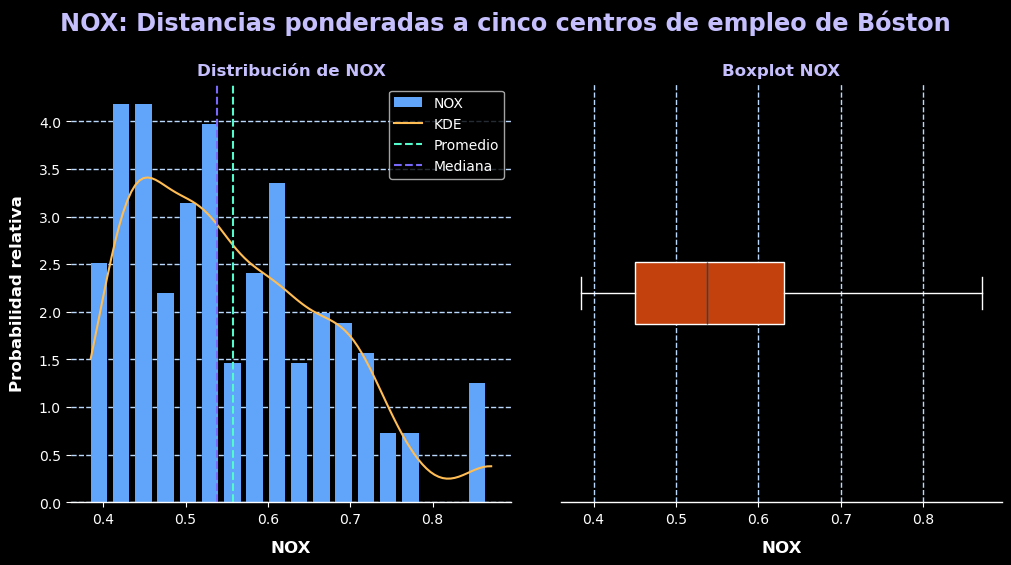

In [13]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle("NOX: Distancias ponderadas a cinco centros de empleo de Bóston",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de NOX",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="NOX",
			data=df_training,
			bins=18,
			density=True,
			color="#60A5FA",
			width=0.02,
			zorder=2)

x = np.linspace(df_training["NOX"].min(), df_training["NOX"].max(), 100)
kde = stats.gaussian_kde(df_training["NOX"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["NOX"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["NOX"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("NOX", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot NOX",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="NOX",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("NOX", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **AGE:** Proporción de unidades ocupadas por el propietario construidas antes de 1940

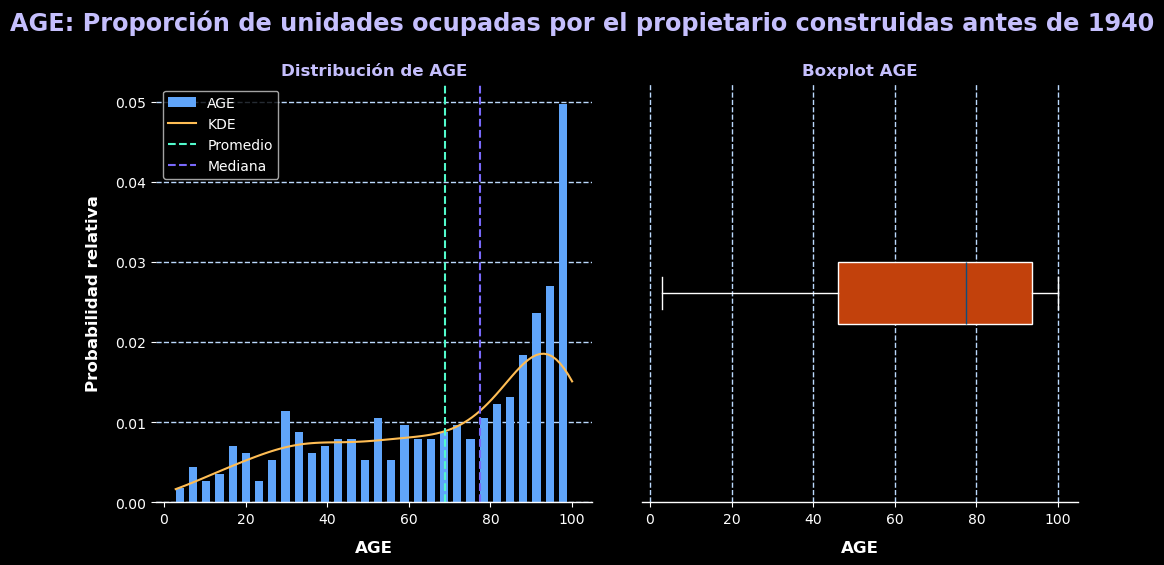

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de AGE",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="AGE",
			data=df_training,
			bins=30,
			density=True,
			color="#60A5FA",
			width=2,
			zorder=2)

x = np.linspace(df_training["AGE"].min(), df_training["AGE"].max(), 100)
kde = stats.gaussian_kde(df_training["AGE"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["AGE"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["AGE"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("AGE", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot AGE",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="AGE",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("AGE", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

La distribución está derechizada

##### **TAX:** Tasa de impuesto sobre la propiedad de valor total por $10.000

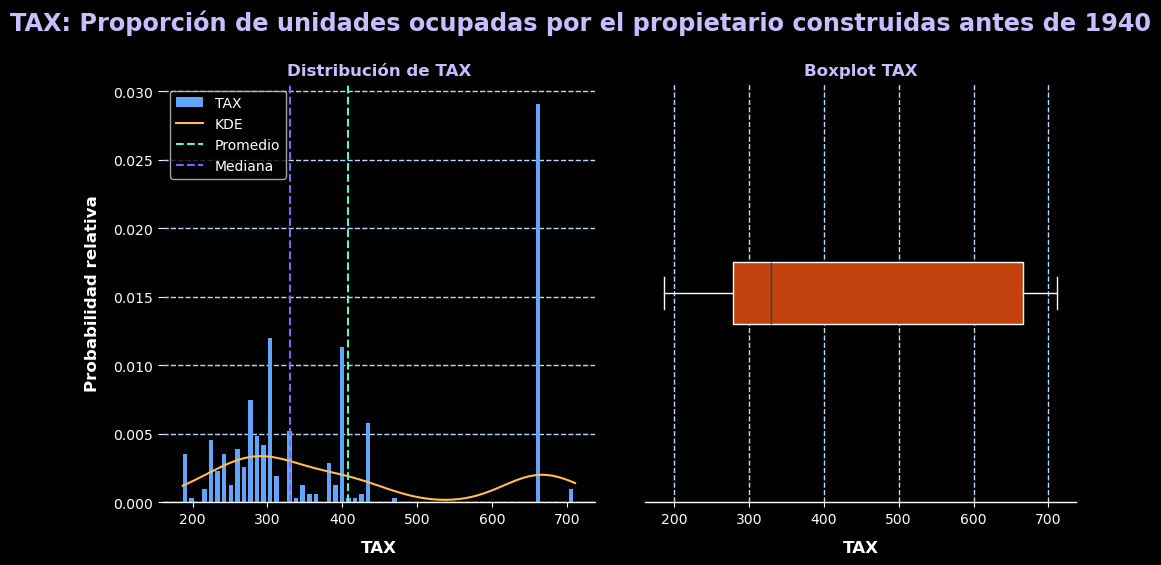

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("TAX: Proporción de unidades ocupadas por el propietario construidas antes de 1940",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de TAX",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="TAX",
			data=df_training,
			bins=60,
			density=True,
			color="#60A5FA",
			width=6,
			zorder=2)

x = np.linspace(df_training["TAX"].min(), df_training["TAX"].max(), 100)
kde = stats.gaussian_kde(df_training["TAX"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["TAX"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["TAX"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("TAX", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot TAX",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="TAX",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("TAX", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **PTRATIO:** Relación alumno-maestro por ciudad

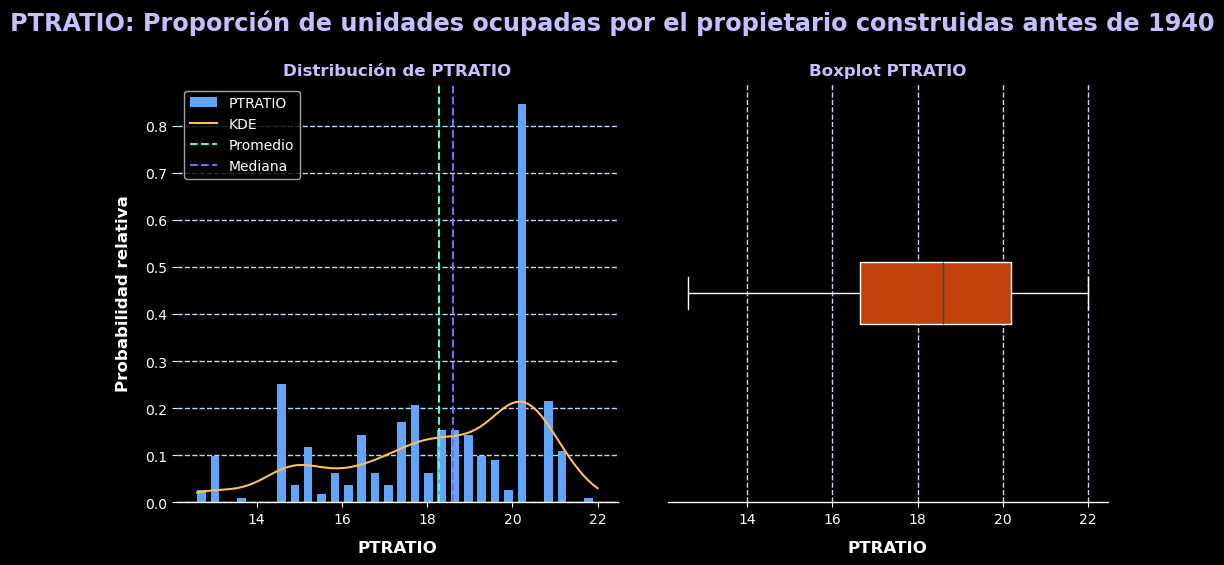

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}
fig.suptitle("PTRATIO: Proporción de unidades ocupadas por el propietario construidas antes de 1940",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de PTRATIO",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="PTRATIO",
			data=df_training,
			bins=30,
			density=True,
			color="#60A5FA",
			width=0.2,
			zorder=2)

x = np.linspace(df_training["PTRATIO"].min(), df_training["PTRATIO"].max(), 100)
kde = stats.gaussian_kde(df_training["PTRATIO"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["PTRATIO"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["PTRATIO"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("PTRATIO", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot PTRATIO",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="PTRATIO",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("PTRATIO", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **CHAS:** Variable ficticia del río Charles (1 si el sector limita con el río; 0 en caso contrario)

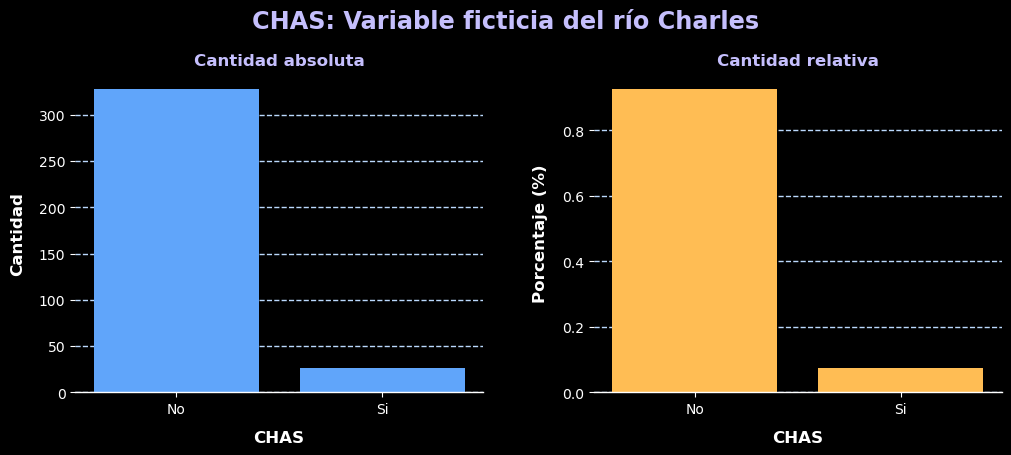

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("CHAS: Variable ficticia del río Charles",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Cantidad absoluta",
				 color="#C5BFFD",
				 fontdict=font_config)

data = df_training["CHAS"].value_counts()
axs[0].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#60A5FA",
		   zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xticks(ticks=data.index, labels=["No", "Si"])
axs[0].set_xlabel("CHAS", labelpad=10, fontdict=font_config)

axs[0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Cantidad relativa",
				 color="#C5BFFD",
				 fontdict=font_config)


data = df_training["CHAS"].value_counts()/df_training.shape[0]
axs[1].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#FFBD54",
		   zorder=2)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_xticks(ticks=data.index, labels=["No", "Si"])
axs[1].set_xlabel("CHAS", labelpad=10, fontdict=font_config)

axs[1].set_ylabel("Porcentaje (%)", labelpad=10, fontdict=font_config)

axs[1].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **RAD:** Índice de accesibilidad a autopistas radiales

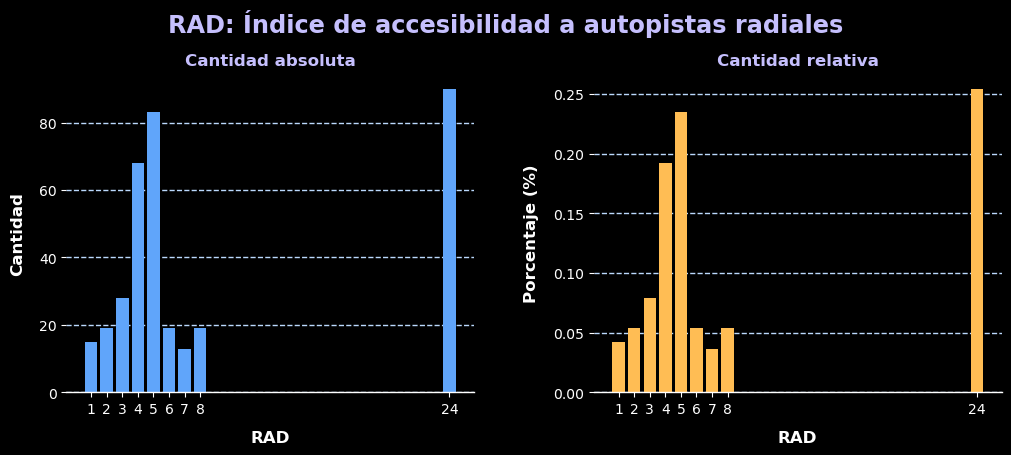

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), layout="constrained")
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig.suptitle("RAD: Índice de accesibilidad a autopistas radiales",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Cantidad absoluta",
				 color="#C5BFFD",
				 fontdict=font_config)

data = df_training["RAD"].value_counts()
axs[0].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#60A5FA",
		   zorder=2)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xticks(ticks=data.index)
axs[0].set_xlabel("RAD", labelpad=10, fontdict=font_config)

axs[0].set_ylabel("Cantidad", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Cantidad relativa",
				 color="#C5BFFD",
				 fontdict=font_config)


data = df_training["RAD"].value_counts()/df_training.shape[0]
axs[1].bar(x=data.index,
		   height=data.values,
		   data=data,
		   color="#FFBD54",
		   zorder=2)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_xticks(ticks=data.index)
axs[1].set_xlabel("RAD", labelpad=10, fontdict=font_config)

axs[1].set_ylabel("Porcentaje (%)", labelpad=10, fontdict=font_config)

axs[1].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **LSTAT:** % de población de estatus socioeconómico bajo

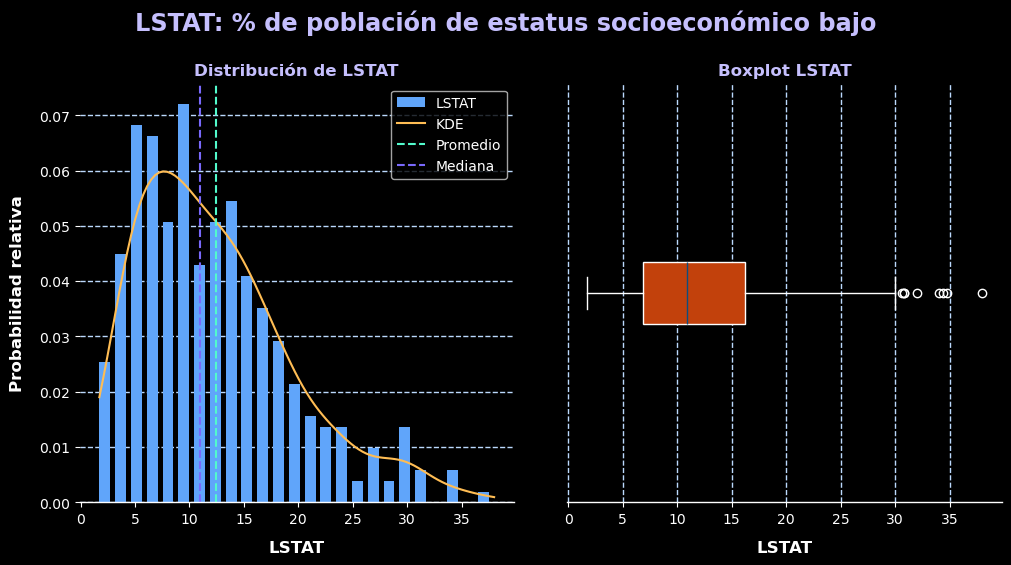

In [19]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle(t="LSTAT: % de población de estatus socioeconómico bajo",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de LSTAT",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="LSTAT",
			data=df_training,
			bins=25,
			density=True,
			color="#60A5FA",
			width=1,
			zorder=2)

x = np.linspace(df_training["LSTAT"].min(), df_training["LSTAT"].max(), 100)
kde = stats.gaussian_kde(df_training["LSTAT"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["LSTAT"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["LSTAT"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("LSTAT", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()



font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot LSTAT",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="LSTAT",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("LSTAT", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### **RM:** Número promedio de habitaciones por vivienda

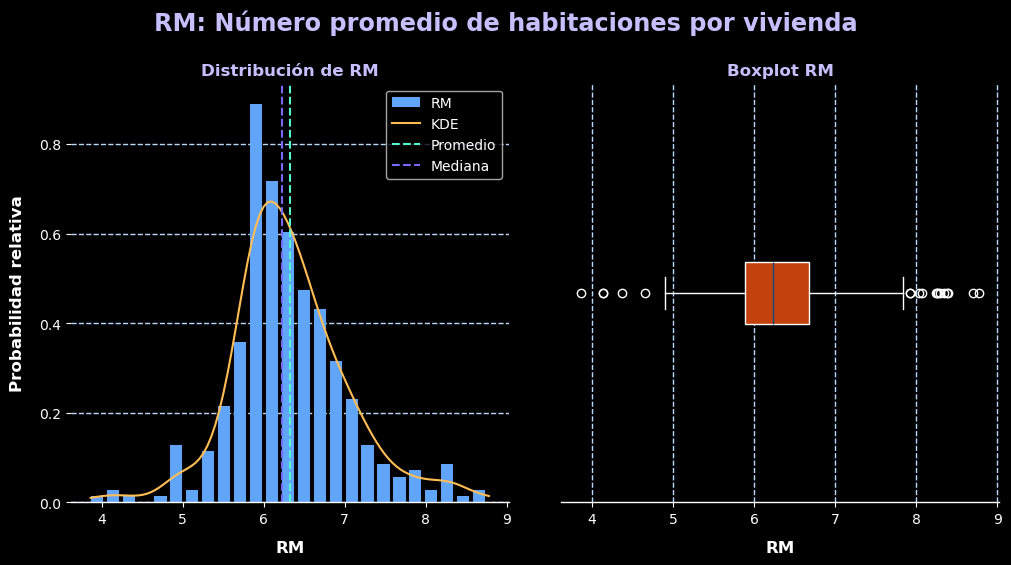

In [20]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")
fig.suptitle(t="RM: Número promedio de habitaciones por vivienda",
			 color="#C5BFFD",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[0].set_title("Distribución de RM",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[0].hist(x="RM",
			data=df_training,
			bins=25,
			density=True,
			color="#60A5FA",
			width=0.15,
			zorder=2)

x = np.linspace(df_training["RM"].min(), df_training["RM"].max(), 100)
kde = stats.gaussian_kde(df_training["RM"])
axs[0].plot(x, kde(x), color="#FFBD54", label="KDE")

axs[0].axvline(df_training["RM"].mean(),
			   linestyle="dashed",
			   color="#52FACC",
			   label="Promedio")
axs[0].axvline(df_training["RM"].median(),
			   linestyle="dashed",
			   color="#7969FB",
			   label="Mediana")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("RM", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("Probabilidad relativa", labelpad=10, fontdict=font_config)
axs[0].grid(axis="y",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)
axs[0].spines[["left", "top", "right"]].set_visible(False)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].legend()



font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "heavy"
}
axs[1].set_title("Boxplot RM",
				 color="#C5BFFD",
				 fontdict=font_config)

axs[1].boxplot(x="RM",
			   data=df_training,
			   boxprops={ "facecolor" : "#C2410C" },
			   medianprops={ "color" : "#0F4D7D" },
			   orientation="horizontal",
			   patch_artist=True)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_yticks([])
axs[1].set_xlabel("RM", labelpad=10, fontdict=font_config)
axs[1].set_ylabel("")
axs[1].grid(axis="x",
			alpha=1,
			color="#BBD9FD",
			linestyle="dashed",
			linewidth=1)

axs[1].spines[["left", "top", "right"]].set_visible(False)
axs[1].spines["bottom"].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### Correlaciones

**RM** y **LSTAT**

Correlación entre el número promedio de habitaciones por vivienda y el % de población de estatus socioeconómico bajo.

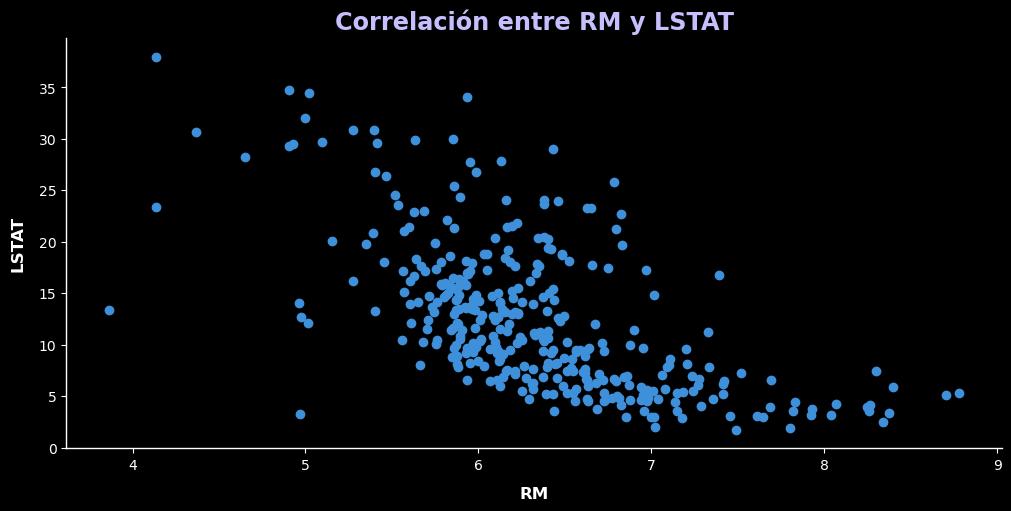

In [21]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.set_title("Correlación entre RM y LSTAT",
			 color="#C5BFFD",
			 fontdict=font_config)

scatter = ax.scatter(x="RM",
					 y="LSTAT",
					 data=df_training)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.set_xlabel("RM", labelpad=10, fontdict=font_config)
ax.set_ylabel("LSTAT", labelpad=10, fontdict=font_config)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1)

plt.show()

**TAX** y **RAD**

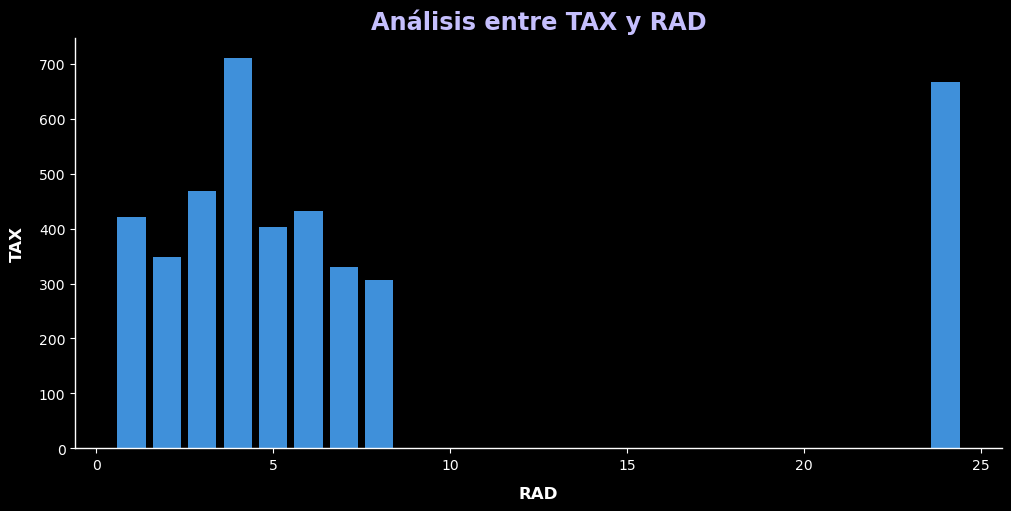

In [22]:
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.set_title("Análisis entre TAX y RAD",
			 color="#C5BFFD",
			 fontdict=font_config)

ax.bar(x="RAD", height="TAX", data=df_training)

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.set_xlabel("RAD", labelpad=10, fontdict=font_config)
ax.set_ylabel("TAX", labelpad=10, fontdict=font_config)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1)

plt.show()

##### Correlación

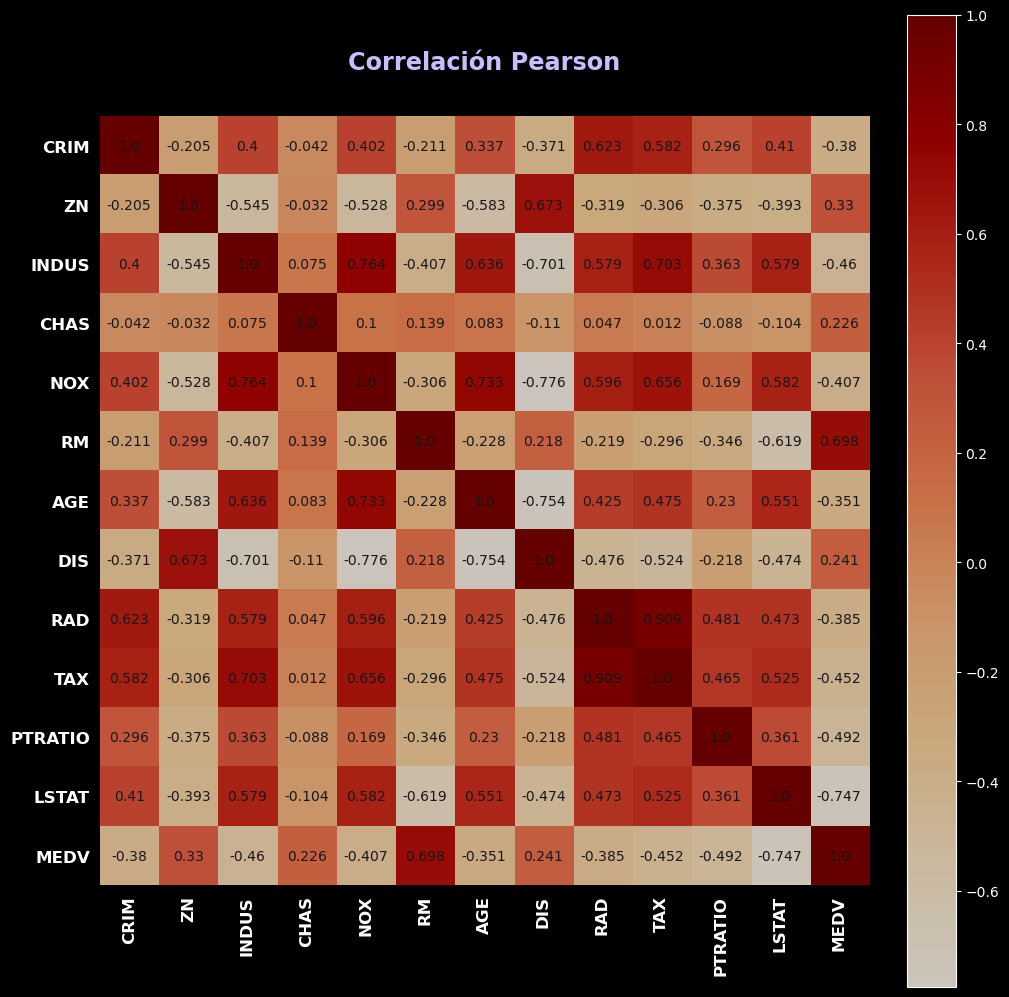

In [23]:
correlations = df_training.corr()

font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "black"
}

fig, ax = plt.subplots(figsize=(10, 10), layout="constrained")
ax.set_title("Correlación Pearson",
			 color="#C5BFFD",
			 y=1.05,
			 fontdict=font_config)

# HEATMAP
hm = ax.imshow(X=correlations, alpha=0.8, cmap="OrRd")

# COLORBAR
cbar = ax.figure.colorbar(hm, ax=ax)
cbar.ax.set_ylabel("", rotation=-90, ha="center", va="bottom")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
ax.set_xticks(ticks=range(0, len(correlations.columns)),
			  labels=correlations.columns,
			  fontdict=font_config,
			  rotation=90)
ax.set_yticks(ticks=range(0, len(correlations.columns)),
			  fontdict=font_config,
			  labels=correlations.columns)
ax.tick_params(axis="both", width=0)

for i in range(correlations.shape[0]):
	for j in range(correlations.shape[1]):
		correlation = round(correlations.iloc[i, j], 3)
		text = ax.text(j, i, correlation,
					   horizontalalignment="center",
					   verticalalignment="center",
					   color="#171717")

ax.spines[["left", "top", "right", "bottom"]].set_visible(False)

plt.show()

#### Linear Regression
##### Modelo base

Configuramos un modelo base sin transformación en los datos a modo de tener un modelo con el cuál testear el modelo final.

Todavía no hemos realizado una selección de `features` ni hemos eliminado aquellas variables que poseen mucha colinealidad. Por ejemplo, la variable `RAD` *—índice de accesibilidad a autopistas radiales—* posee mucha correlación de `0.909` con `TAX` *—tasa de impuesto sobre la propiedad de valor total por $10.000—*.

In [24]:
features = df_training.columns.difference(other=["MEDV"])
df_training.loc[:, features].sample()

,AGE,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
256,42.6,0.0,0.27957,2.3817,9.69,13.59,0.585,19.2,6.0,5.926,391.0,0.0


In [25]:
df_training.loc[:, "MEDV"].sample()

123    20.6
Name: MEDV, dtype: float64

In [26]:
linear_regression = linear_model.LinearRegression()

# Entrenamos el modelo
linear_regression.fit(X=df_training[features], y=df_training["MEDV"])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**Parámetros del modelo**

In [27]:
intercept = linear_regression.intercept_
print("Ordenada al origen:", intercept)

coeficientes = linear_regression.coef_
coeficientes = pd.Series(data=coeficientes,
						 index=df_training[features].columns,
						 name="coeficientes")
coeficientes

Ordenada al origen: 37.57987443867442


AGE        -0.008871
CHAS        3.464923
CRIM       -0.139806
DIS        -1.388564
INDUS       0.036298
LSTAT      -0.573644
NOX       -15.983177
PTRATIO    -0.890506
RAD         0.219830
RM          3.899807
TAX        -0.009200
ZN          0.036119
Name: coeficientes, dtype: float64

In [28]:
print("TRAIN")
print("-"*30)
train_predicts = linear_regression.predict(df_training[features])
mse = metrics.mean_squared_error(df_training["MEDV"], train_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_training["MEDV"], train_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_training["MEDV"], train_predicts)
print("R² score:", round(r2, 3))

print("\nTEST")
print("-"*30)
test_predicts = linear_regression.predict(df_test[features])
mse = metrics.mean_squared_error(df_test["MEDV"], test_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_test["MEDV"], test_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_test["MEDV"], test_predicts)
print("R² score:", round(r2, 3))

TRAIN
------------------------------
Mean Squared Error: 23.374
Root Mean Squared Error: 4.835
R² score: 0.734

TEST
------------------------------
Mean Squared Error: 21.115
Root Mean Squared Error: 4.595
R² score: 0.717


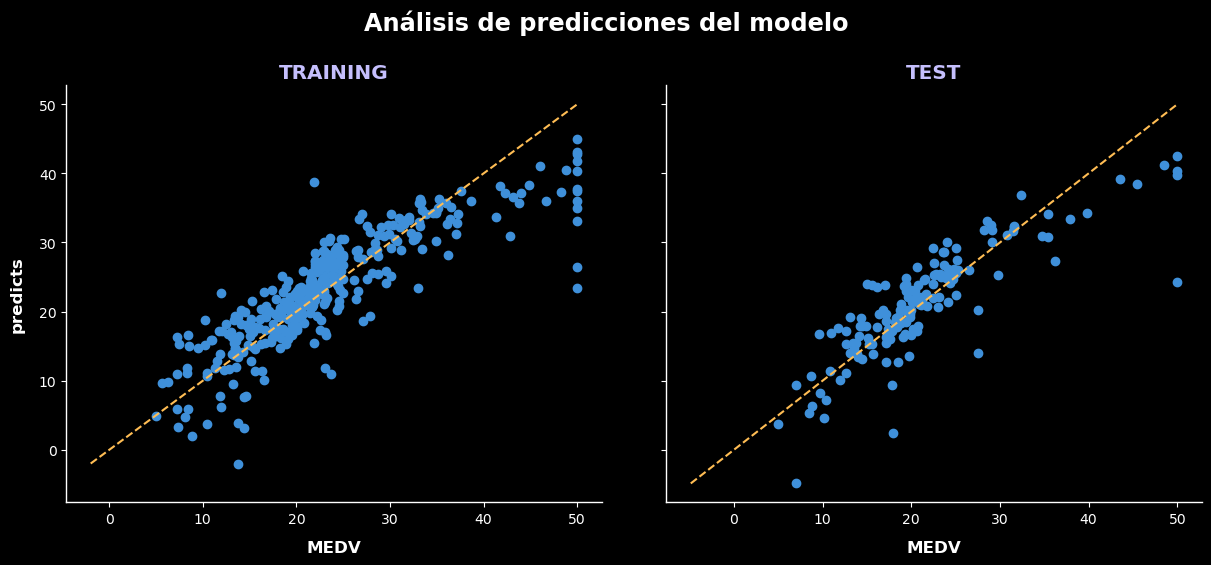

In [29]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						figsize=(12, 5),
						layout="constrained",
						sharey=True)
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "heavy"
}
fig.suptitle("Análisis de predicciones del modelo",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "heavy"
}
axs[0].set_title("TRAINING", color="#C5BFFD", fontdict=font_config, pad=5)

scatter = axs[0].scatter(x=df_training["MEDV"], y=train_predicts, label="Train")

min_val = min(df_training["MEDV"].min(), train_predicts.min())
max_val = max(df_training["MEDV"].max(), train_predicts.max())
axs[0].plot([min_val, max_val],
			[min_val, max_val],
			color="#FFBD54",
			linestyle="dashed",
			label="Train")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("MEDV", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("predicts", labelpad=10, fontdict=font_config)
axs[0].spines[["top", "right"]].set_visible(False)
axs[0].spines[["left", "bottom"]].set_linewidth(1)



font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "heavy"
}
axs[1].set_title("TEST", color="#C5BFFD", fontdict=font_config, pad=5)

scatter = axs[1].scatter(x=df_test["MEDV"], y=test_predicts, label="Testing")

min_val = min(df_test["MEDV"].min(), test_predicts.min())
max_val = max(df_test["MEDV"].max(), test_predicts.max())
axs[1].plot([min_val, max_val],
			[min_val, max_val],
			color="#FFBD54",
			linestyle="dashed",
			label="Test: y=x")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_xlabel("MEDV", labelpad=10, fontdict=font_config)
axs[1].spines[["top", "right"]].set_visible(False)
axs[1].spines[["left", "bottom"]].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

En esta primer aproximación, notamos que el modelo es bastante consitente en train y test.

##### Selección de features

Como hemos visto, hay variables que tienen colinealidad `RAD` y `TAX` e `INDUS` y `NOX`. Eliminamos `TAX` e `INDUS`.

In [30]:
features = df_training.columns.difference(other=["TAX", "INDUS"])
features

Index(['AGE', 'CHAS', 'CRIM', 'DIS', 'LSTAT', 'MEDV', 'NOX', 'PTRATIO', 'RAD',
       'RM', 'ZN'],
      dtype='object')

##### Escalado de features

Escalamos las features utilizando `StandardScaler`.

In [31]:
to_scale = features.difference(other=["CHAS", "RAD"])
to_scale

Index(['AGE', 'CRIM', 'DIS', 'LSTAT', 'MEDV', 'NOX', 'PTRATIO', 'RM', 'ZN'], dtype='object')

In [32]:
df_features = df_training[features].copy()
df_features

,AGE,CHAS,CRIM,DIS,LSTAT,MEDV,NOX,PTRATIO,RAD,RM,ZN
0,58.7,0.0,0.02985,6.0622,5.21,28.7,0.458,18.7,3.0,6.430,0.0
1,72.5,0.0,0.13158,2.7301,12.04,21.2,0.547,17.8,6.0,6.176,0.0
2,33.8,0.0,0.17142,5.1004,10.21,19.3,0.448,17.9,3.0,5.682,0.0
3,29.3,0.0,1.05393,4.4986,6.58,23.1,0.538,21.0,4.0,5.935,0.0
4,71.0,0.0,15.57570,2.9084,18.13,19.1,0.580,20.2,24.0,5.926,0.0
...,...,...,...,...,...,...,...,...,...,...,...
349,91.9,0.0,0.17120,2.2110,18.66,19.5,0.520,20.9,5.0,5.836,0.0
350,42.1,0.0,0.29916,4.4290,13.00,21.1,0.464,18.6,3.0,5.856,20.0
351,29.7,0.0,0.01501,8.3440,5.99,24.5,0.435,17.0,4.0,6.635,80.0
352,94.6,0.0,11.16040,2.1247,23.27,13.4,0.740,20.2,24.0,6.629,0.0


Escalamos las variables númericas...

In [33]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_features[to_scale])

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [34]:
standard_scaler.scale_

array([27.62625716,  8.30407703,  2.12302684,  7.1023496 ,  9.3753149 ,
        0.11662683,  2.25360235,  0.71819446, 22.57650111])

In [35]:
data_scaled = standard_scaler.transform(df_features[to_scale])
df_scaled = pd.DataFrame(data_scaled, columns=to_scale)

In [36]:
df_training = pd.concat(
		[df_scaled, df_features[["CHAS", "RAD"]].reset_index(drop=True)],
		axis=1
)

##### Encoding

In [ ]:
df_training = pd.get_dummies(df_training, columns=["CHAS", "RAD"])
columns = df_training.iloc[:, 9:].columns
for column in columns:
	df_training[column] = df_training[column].astype(int)

##### Nuevo modelo

In [86]:
linear_regression = linear_model.LinearRegression()

# Entrenamos el modelo
x = df_training.columns.difference(other=["MEDV"])
linear_regression.fit(X=df_training[x], y=df_training["MEDV"])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**Nuevos parámetros del modelo**

In [87]:
intercept = linear_regression.intercept_
print("Ordenada al origen:", intercept)

coeficientes = linear_regression.coef_
coeficientes = pd.Series(data=coeficientes,
						 index=df_training[x].columns,
						 name="coeficientes")
coeficientes

Ordenada al origen: 0.13257488049830435


AGE        -0.028788
CHAS_0.0   -0.182201
CHAS_1.0    0.182201
CRIM       -0.124601
DIS        -0.332366
LSTAT      -0.435913
NOX        -0.204605
PTRATIO    -0.217733
RAD_1.0    -0.261804
RAD_2.0    -0.108184
RAD_24.0    0.130687
RAD_3.0     0.230280
RAD_4.0    -0.063502
RAD_5.0    -0.001156
RAD_6.0    -0.248475
RAD_7.0     0.186651
RAD_8.0     0.135502
RM          0.289502
ZN          0.093065
Name: coeficientes, dtype: float64

Recordamos los valores de Train en nuestro modelo base:

```bash
TRAIN
================================
'Mean Squared Error': 23.374
'Root Mean Squared Error': 4.835
'R² score': 0.734
```

In [88]:
print("TRAIN")
print("-"*30)
train_predicts = linear_regression.predict(df_training[x])
mse = metrics.mean_squared_error(df_training["MEDV"], train_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_training["MEDV"], train_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_training["MEDV"], train_predicts)
print("R² score:", round(r2, 3))

TRAIN
------------------------------
Mean Squared Error: 0.257
Root Mean Squared Error: 0.507
R² score: 0.743


Como hemos aplicado un escalado de los valores van a existir mucha discrepancia en las métricas `MSE` y `RMSE`. Por ello, `R² Score` nos puede dar una pista de como esta performando nuestro modelo.

Verificamos como se comporta el modelo en el testing.

In [92]:
print("Features seleccionadas:\n", features.values)
print("Features a estandarizar:\n", to_scale.values)

Features seleccionadas:
 ['AGE' 'CHAS' 'CRIM' 'DIS' 'LSTAT' 'MEDV' 'NOX' 'PTRATIO' 'RAD' 'RM' 'ZN']
Features a estandarizar:
 ['AGE' 'CRIM' 'DIS' 'LSTAT' 'MEDV' 'NOX' 'PTRATIO' 'RM' 'ZN']


In [93]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_test[to_scale])

data_scaled = standard_scaler.transform(df_test[to_scale])
df_scaled = pd.DataFrame(data_scaled, columns=to_scale)

df_test = pd.concat(
		[df_scaled, df_test[["CHAS", "RAD"]].reset_index(drop=True)],
		axis=1
)
df_test.sample(5)

,AGE,CRIM,DIS,LSTAT,MEDV,NOX,PTRATIO,RM,ZN,CHAS,RAD
99,1.092853,1.095452,-1.135855,1.118218,-0.487471,0.425341,0.711471,0.717096,-0.452572,0.0,24.0
96,1.092853,0.572983,-1.310162,-0.510327,3.312301,0.724896,0.711471,0.041285,-0.452572,0.0,24.0
9,0.398461,-0.403765,-0.663756,0.158365,-0.533809,0.319616,0.176901,-0.248348,-0.452572,0.0,6.0
119,-1.694978,-0.419156,1.131697,-0.951943,0.265533,-1.063622,-1.212982,0.447385,0.752174,0.0,6.0
145,0.316365,-0.423439,-0.120602,-0.362658,-0.093592,-0.746447,-0.357670,0.091856,0.671857,0.0,4.0


In [94]:
df_test = pd.get_dummies(df_test, columns=["CHAS", "RAD"])
columns = df_test.iloc[:, 9:].columns
for column in columns:
	df_test[column] = df_test[column].astype(int)

Recordamos los valores obtenidos previamente...

```bash
TEST
==============================
'Mean Squared Error': 21.115
'Root Mean Squared Error': 4.595
'R² score': 0.717
```

In [95]:
print("\nTEST")
print("-"*30)
test_predicts = linear_regression.predict(df_test[x])
mse = metrics.mean_squared_error(df_test["MEDV"], test_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_test["MEDV"], test_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_test["MEDV"], test_predicts)
print("R² score:", round(r2, 3))


TEST
------------------------------
Mean Squared Error: 0.279
Root Mean Squared Error: 0.528
R² score: 0.721


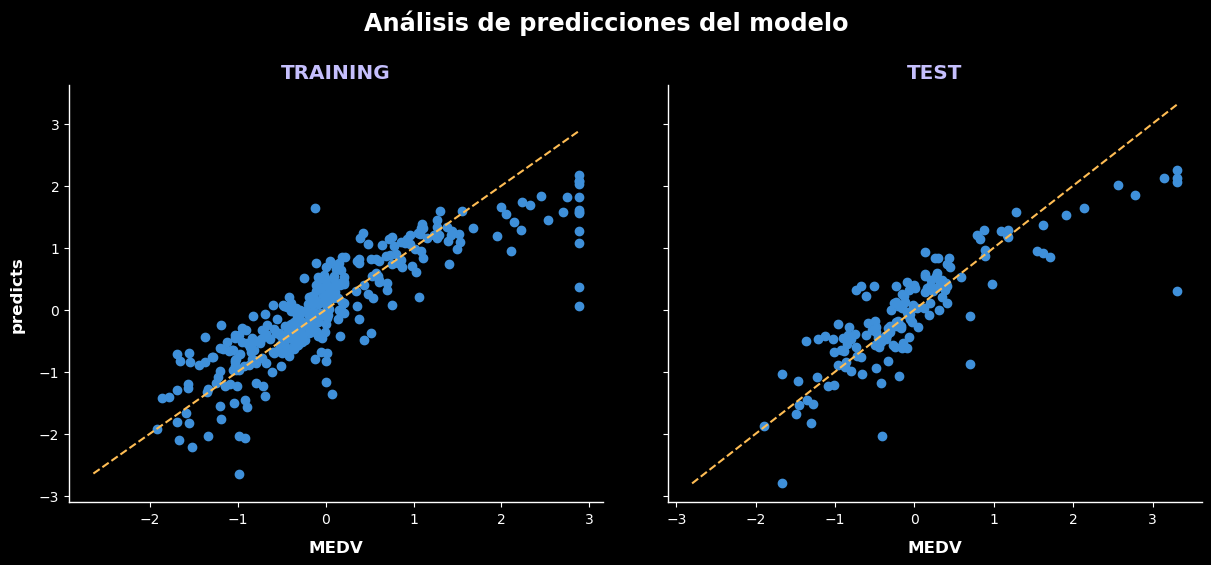

In [96]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						figsize=(12, 5),
						layout="constrained",
						sharey=True)
font_config = {
	"family": "sans-serif",
	"size": "xx-large",
	"weight": "heavy"
}
fig.suptitle("Análisis de predicciones del modelo",
			 fontproperties=font_config,
			 y=1.10)


font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "heavy"
}
axs[0].set_title("TRAINING", color="#C5BFFD", fontdict=font_config, pad=5)

scatter = axs[0].scatter(x=df_training["MEDV"], y=train_predicts, label="Train")

min_val = min(df_training["MEDV"].min(), train_predicts.min())
max_val = max(df_training["MEDV"].max(), train_predicts.max())
axs[0].plot([min_val, max_val],
			[min_val, max_val],
			color="#FFBD54",
			linestyle="dashed",
			label="Train")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[0].set_xlabel("MEDV", labelpad=10, fontdict=font_config)
axs[0].set_ylabel("predicts", labelpad=10, fontdict=font_config)
axs[0].spines[["top", "right"]].set_visible(False)
axs[0].spines[["left", "bottom"]].set_linewidth(1)



font_config = {
	"family": "sans-serif",
	"size": "x-large",
	"weight": "heavy"
}
axs[1].set_title("TEST", color="#C5BFFD", fontdict=font_config, pad=5)

scatter = axs[1].scatter(x=df_test["MEDV"], y=test_predicts, label="Testing")

min_val = min(df_test["MEDV"].min(), test_predicts.min())
max_val = max(df_test["MEDV"].max(), test_predicts.max())
axs[1].plot([min_val, max_val],
			[min_val, max_val],
			color="#FFBD54",
			linestyle="dashed",
			label="Test: y=x")

font_config = {
	"family": "sans-serif",
	"size": "large",
	"weight": "bold"
}
axs[1].set_xlabel("MEDV", labelpad=10, fontdict=font_config)
axs[1].spines[["top", "right"]].set_visible(False)
axs[1].spines[["left", "bottom"]].set_linewidth(1)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

##### Regularización

Aplicamos la regularización `Lasso` y `Ridge` para conseguir que el modelo generalice de mejor forma.

In [104]:
from sklearn.linear_model import Lasso

regularization_lasso = Lasso(alpha=0.02)
regularization_lasso.fit(df_training[x], df_training["MEDV"])

print("TRAIN: Con regularización Lasso (L1)")
print("-"*38)
train_predicts = regularization_lasso.predict(df_training[x])
mse = metrics.mean_squared_error(df_training["MEDV"], train_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_training["MEDV"], train_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_training["MEDV"], train_predicts)
print("R² score:", round(r2, 3))

print("\nTEST: Con regularización Lasso (L1)")
print("-"*38)
test_predicts = regularization_lasso.predict(df_test[x])
mse = metrics.mean_squared_error(df_test["MEDV"], test_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_test["MEDV"], test_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_test["MEDV"], test_predicts)
print("R² score:", round(r2, 3))

TRAIN: Con regularización Lasso (L1)
--------------------------------------
Mean Squared Error: 0.283
Root Mean Squared Error: 0.532
R² score: 0.717

TEST: Con regularización Lasso (L1)
--------------------------------------
Mean Squared Error: 0.311
Root Mean Squared Error: 0.558
R² score: 0.689


Recordamos los valores de `Train/Test` en nuestro luego de hacer un escalado y una selección de features:

```bash
TRAIN
================================
'Mean Squared Error': 0.257
'Root Mean Squared Error': 0.507
'R² score': 0.743

TEST
================================
'Mean Squared Error': 0.279
'Root Mean Squared Error': 0.528
'R² score': 0.721
```

Luego de testear con varios valores, aplicando la regularización `Lasso` no logramos una mejora significativa en la generalización de nuestro modelo.

In [107]:
from sklearn.linear_model import Ridge

regularization_ridge = Ridge(alpha=40)
regularization_ridge.fit(df_training[x], df_training["MEDV"])

print("TRAIN: Con regularización Ridge (L2)")
print("-"*38)
train_predicts = regularization_ridge.predict(df_training[x])
mse = metrics.mean_squared_error(df_training["MEDV"], train_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_training["MEDV"], train_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_training["MEDV"], train_predicts)
print("R² score:", round(r2, 3))

print("\nTEST: Con regularización Ridge (L2)")
print("-"*38)
test_predicts = regularization_ridge.predict(df_test[x])
mse = metrics.mean_squared_error(df_test["MEDV"], test_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_test["MEDV"], test_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_test["MEDV"], test_predicts)
print("R² score:", round(r2, 3))

TRAIN: Con regularización Ridge (L2)
--------------------------------------
Mean Squared Error: 0.271
Root Mean Squared Error: 0.521
R² score: 0.729

TEST: Con regularización Ridge (L2)
--------------------------------------
Mean Squared Error: 0.299
Root Mean Squared Error: 0.547
R² score: 0.701


Luego de testear con varios valores, aplicando la regularización `Ridge` no logramos una mejora significativa en la generalización de nuestro modelo.

In [108]:
from sklearn.linear_model import ElasticNet

regularization_elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.02)
regularization_elastic_net.fit(df_training[x], df_training["MEDV"])

print("TRAIN: Con regularización Elastic Net")
print("-"*38)
train_predicts = regularization_elastic_net.predict(df_training[x])
mse = metrics.mean_squared_error(df_training["MEDV"], train_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_training["MEDV"], train_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_training["MEDV"], train_predicts)
print("R² score:", round(r2, 3))

print("\nTEST: Con regularización Elastic Net")
print("-"*38)
test_predicts = regularization_elastic_net.predict(df_test[x])
mse = metrics.mean_squared_error(df_test["MEDV"], test_predicts)
print("Mean Squared Error:", round(mse, 3))
rmse = metrics.root_mean_squared_error(df_test["MEDV"], test_predicts)
print("Root Mean Squared Error:", round(rmse, 3))
r2 = metrics.r2_score(df_test["MEDV"], test_predicts)
print("R² score:", round(r2, 3))

TRAIN: Con regularización Elastic Net
--------------------------------------
Mean Squared Error: 0.299
Root Mean Squared Error: 0.547
R² score: 0.701

TEST: Con regularización Elastic Net
--------------------------------------
Mean Squared Error: 0.322
Root Mean Squared Error: 0.568
R² score: 0.678


#### Conclusiones

La regularización que mejor resultado dio es `Ridge`, ya que el modelo logra generalizar de mejor manera los resultados a costa de un error más controlado. La métrica que utilice para realizar comparaciónes fue `R² Score`, ya que era la única que podía tener constraste con el modelo base.

Considero que la selección de `features` y el correcto tratado de las mismas son las mejoras en las que seguiría indagando para lograr mejores predicciones.